**Passos iniciais**

In [226]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [227]:
data = pd.read_csv('heart-disease.csv')

**Pré-Processamento dos dados**

In [228]:
attributesName = data.columns[:-1]

Verificando Duplicatas e Amostras inconsistentes

In [229]:
#Criando um dataframe com os registros duplicados em todas as colunas, menos a ultima.
df_duplicates = data[data.duplicated(subset=attributesName, keep=False)]

if len(df_duplicates) > 0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Caso exista, removê-los

In [230]:
data = data.drop_duplicates(keep='first')

Verificar se as amostras foram removidas

In [231]:
#Criando um dataframe com os registros duplicados em todas as colunas, menos a ultima.
df_duplicates = data[data.duplicated(subset=attributesName, keep=False)]

if len(df_duplicates) > 0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


**Estatística dos Dados**

In [232]:
dataInfo = data.describe()
display(dataInfo)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [233]:
Class = data.columns[-1]
np.unique(data[Class], return_counts=True)

(array([0, 1]), array([138, 164]))

Removendo Outliers

In [234]:
dataInfo = data.describe()

# Inicializa um DataFrame limpo
data_clean = data.copy()

outliers_removed = pd.DataFrame()

# Para todas as colunas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = dataInfo[col]['25%']
    Q3 = dataInfo[col]['75%']
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    # Identificando os outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Armazenando os outliers removidos
    outliers_removed = pd.concat([outliers_removed, outliers])

    # Filtrando os dados para remover outliers
    data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]


display(data_clean)

print('\n Os outliers removidos: ')
display(outliers_removed)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



 Os outliers removidos: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


Normalizando os dados com outliers removidos

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


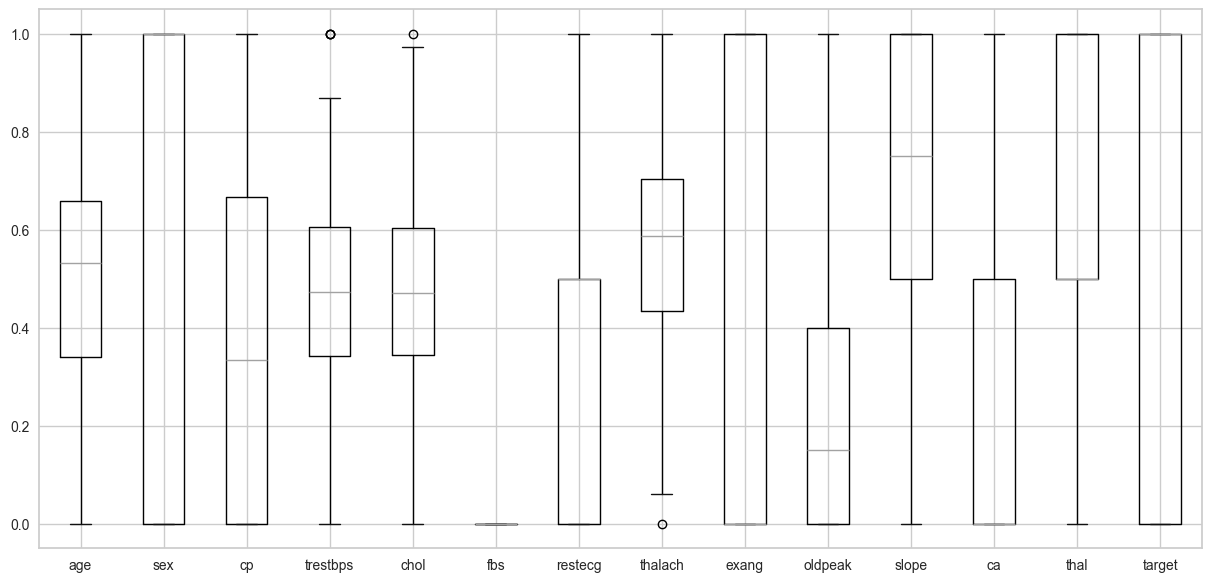

In [235]:
from sklearn.preprocessing import MinMaxScaler

def normaliza(df):
    # Inicializa o MinMaxScaler
    scaler = MinMaxScaler()

    # Seleciona todas as colunas, exceto a última (target class)
    normalizeColumns = df.iloc[:, :-1]

    # Ajusta e transforma os dados com o MinMaxScaler
    df_normalized = pd.DataFrame(scaler.fit_transform(normalizeColumns), columns=normalizeColumns.columns)

    # Adiciona a última coluna não normalizada ao DataFrame normalizado
    df_normalized[df.columns[-1]] = df[df.columns[-1]].values  # Usar .values para garantir a compatibilidade

    return df_normalized

data_clean = normaliza(data_clean)

# Verificar se há NaNs na target class após a normalização
print(data_clean.isnull().sum())

# Gera um boxplot para cada atributo
data_clean.boxplot(figsize=(15,7))
plt.show()


Inputando dados usando o KNN para correção de outliers

In [236]:
from sklearn.impute import KNNImputer

dataInfo = data.describe()

# Inicializa um DataFrame limpo
data_knn = data.copy()


outliers_removed = pd.DataFrame()

# Para todas as colunas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Inicializa o KNNImputer
imputer = KNNImputer(n_neighbors=5)

for col in numerical_cols:
    Q1 = dataInfo[col]['25%']
    Q3 = dataInfo[col]['75%']
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Armazenando os outliers removidos
    outliers_removed = pd.concat([outliers_removed, outliers])

    # Criar uma cópia da coluna original para imputação
    temp_column = data_knn[col].copy()

    # Imputar valores nos outliers
    outlier_indices = temp_column[(temp_column < lower_bound) | (temp_column > upper_bound)].index
    temp_column[outlier_indices] = None  # Definir outliers como None para imputação

    # Ajustar a coluna com imputação KNN
    temp_column_imputed = imputer.fit_transform(temp_column.values.reshape(-1, 1))

    # Atualizar a coluna no DataFrame limpo
    data_knn[col] = temp_column_imputed

display(data_knn)
display(outliers_removed)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,0.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


Normalizando os dados com imputação KNN 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


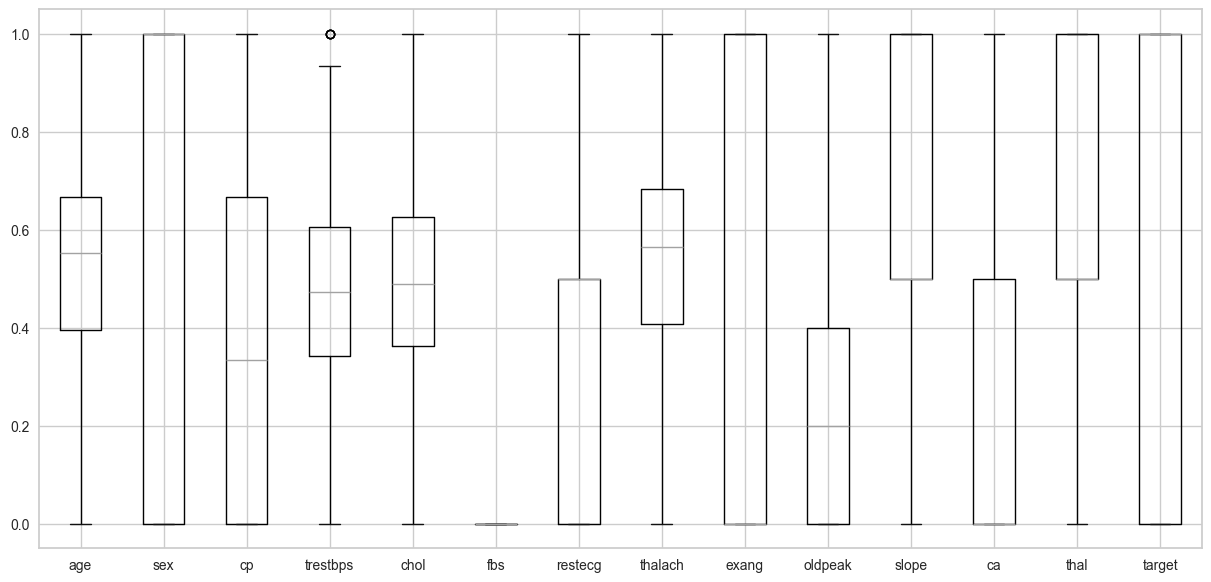

In [237]:
from sklearn.preprocessing import MinMaxScaler

def normaliza(df):
    # Inicializa o MinMaxScaler
    scaler = MinMaxScaler()

    # Seleciona todas as colunas, exceto a última (target class)
    normalizeColumns = df.iloc[:, :-1]

    # Ajusta e transforma os dados com o MinMaxScaler
    df_normalized = pd.DataFrame(scaler.fit_transform(normalizeColumns), columns=normalizeColumns.columns)

    # Adiciona a última coluna não normalizada ao DataFrame normalizado
    df_normalized[df.columns[-1]] = df[df.columns[-1]].values  # Usar .values para garantir a compatibilidade

    return df_normalized

data_knn = normaliza(data_knn)

# Verificar se há NaNs na target class após a normalização
print(data_knn.isnull().sum())

# Gera um boxplot para cada atributo
data_knn.boxplot(figsize=(15,7))
plt.show()

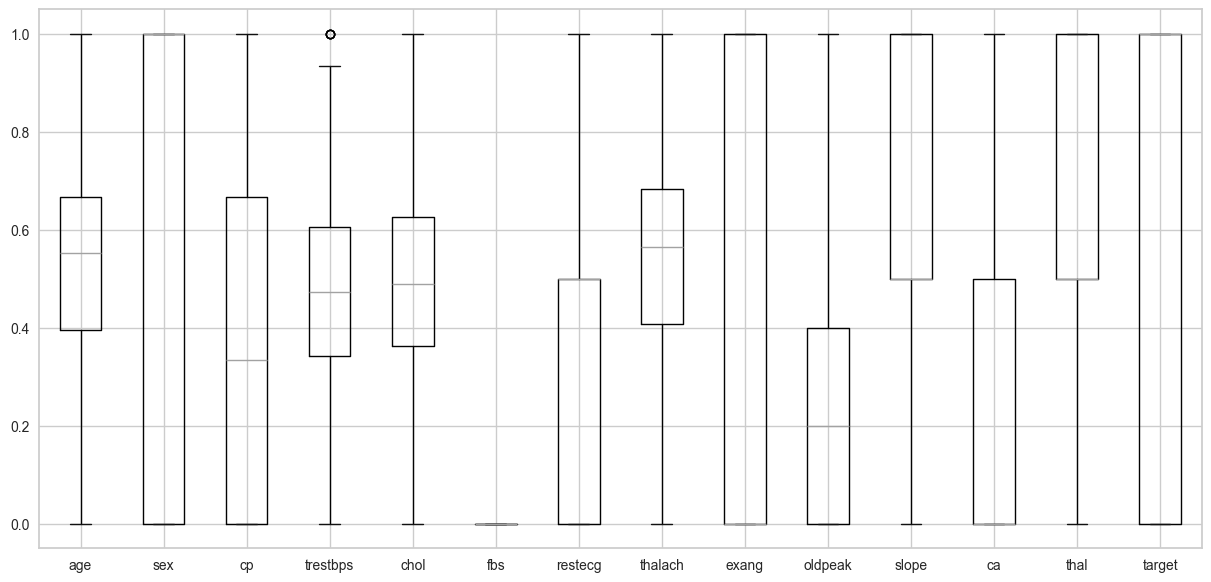

In [238]:
data_knn.boxplot(figsize=(15, 7))
plt.show()

**Separação de Amostras**

In [239]:
Class_Clean = data_clean.columns[-1]
np.unique(data[Class_Clean], return_counts=True)

Class_KNN = data_knn.columns[-1]
np.unique(data[Class_KNN], return_counts=True)

(array([0, 1]), array([138, 164]))

In [240]:
sns.countplot(x = data_clean[Class_Clean])
sns.countplot(x = data_knn[Class_KNN])

<Axes: xlabel='target', ylabel='count'>

**Separando os atributos de entrada e de classe**

In [241]:
x_prev_clean = data_clean.iloc[:, :-1]
print(x_prev_clean)

x_prev_knn = data_knn.iloc[:, :-1]
print(x_prev_knn)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.170213  1.0  0.666667  0.473684  0.519651  0.0      0.5  0.868421   
1    0.255319  0.0  0.333333  0.473684  0.318777  0.0      0.0  0.736842   
2    0.574468  1.0  0.333333  0.342105  0.458515  0.0      0.5  0.789474   
3    0.595745  0.0  0.000000  0.342105  0.973799  0.0      0.5  0.657895   
4    0.595745  1.0  0.000000  0.605263  0.266376  0.0      0.5  0.526316   
..        ...  ...       ...       ...       ...  ...      ...       ...   
223  0.723404  0.0  0.000000  0.394737  0.288210  0.0      0.5  0.421053   
224  0.595745  0.0  0.000000  0.605263  0.480349  0.0      0.5  0.307018   
225  0.340426  1.0  1.000000  0.210526  0.580786  0.0      0.5  0.385965   
226  0.595745  1.0  0.000000  0.473684  0.000000  0.0      0.5  0.236842   
227  0.595745  0.0  0.333333  0.473684  0.458515  0.0      0.0  0.754386   

     exang  oldpeak  slope   ca  thal  
0      0.0    0.875    0.0  0.0   0.5  
1      

In [242]:
y_prev_clean = data_clean.iloc[:,-1]
print(y_prev_clean)

y_prev_knn = data_knn.iloc[:,-1]
print(y_prev_knn)

0      1
1      1
2      1
3      1
4      1
      ..
223    0
224    0
225    0
226    0
227    0
Name: target, Length: 228, dtype: int64
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
297    0.0
298    0.0
299    0.0
300    0.0
301    0.0
Name: target, Length: 302, dtype: float64


**Separação de dados**

In [243]:
print(x_prev_clean.shape)
print(x_prev_knn.shape)

(228, 13)
(302, 13)


In [244]:
print(y_prev_clean.shape)
print(y_prev_knn.shape)

(228,)
(302,)


In [245]:
from sklearn.model_selection import train_test_split
#colocando random state em 0 para testes mais consistentes
x_treino_knn, x_teste_knn, y_treino_knn, y_teste_knn = train_test_split(x_prev_knn, y_prev_knn, test_size = 0.20, random_state = 0)

x_treino_clean, x_teste_clean, y_treino_clean, y_teste_clean = train_test_split(x_prev_clean, y_prev_clean, test_size = 0.20, random_state = 0)

**Area de treino dos modelos**

*Naive Bayes*

DataSet com os outliers removidos

In [246]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_treino_clean, y_treino_clean)
previsoes = modelo.predict(x_teste_clean)

In [247]:
confusion_matrix(y_teste_clean, previsoes)

array([[21,  3],
       [ 7, 15]])

In [248]:
print(classification_report(y_teste_clean, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.83      0.68      0.75        22

    accuracy                           0.78        46
   macro avg       0.79      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



DataSet com KNN

In [249]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_treino_knn, y_treino_knn)
previsoes = modelo.predict(x_teste_knn)

In [250]:
confusion_matrix(y_teste_knn, previsoes)

array([[23,  4],
       [ 3, 31]])

In [251]:
print(classification_report(y_teste_knn, previsoes))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



**Decision Tree**

DataSet com os Outliers removidos

In [252]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'splitter': ['random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)



In [253]:
modelo.fit(x_treino_clean, y_treino_clean)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'splitter': 'random', 'max_features': 0.6, 'max_depth': 6, 'criterion': 'gini'}
0.8242690058479532


In [254]:
X = data_clean.drop('target', axis=1)  # Features
y = data_clean['target']                # Target

In [255]:
modelo= DecisionTreeClassifier(**modelo.best_params_)
modelo.fit(x_treino_clean, y_treino_clean)

DecisionTreeClassifier(max_depth=6, max_features=0.6, splitter='random')

In [256]:
previsoes = modelo.predict(x_teste_clean)
accuracy_score(y_teste_clean,previsoes)

0.7391304347826086

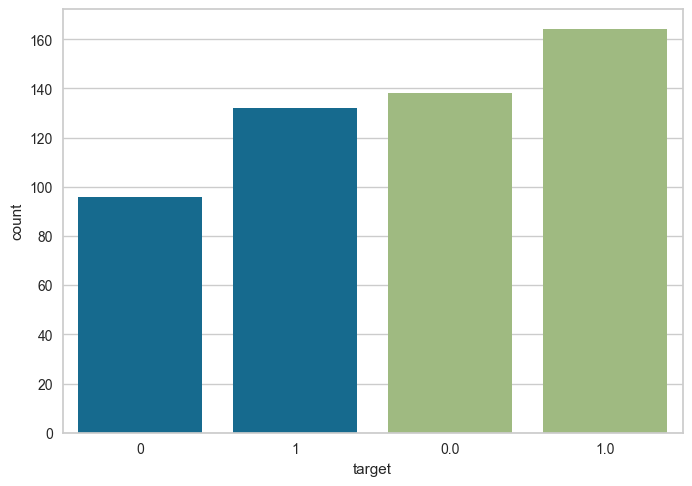

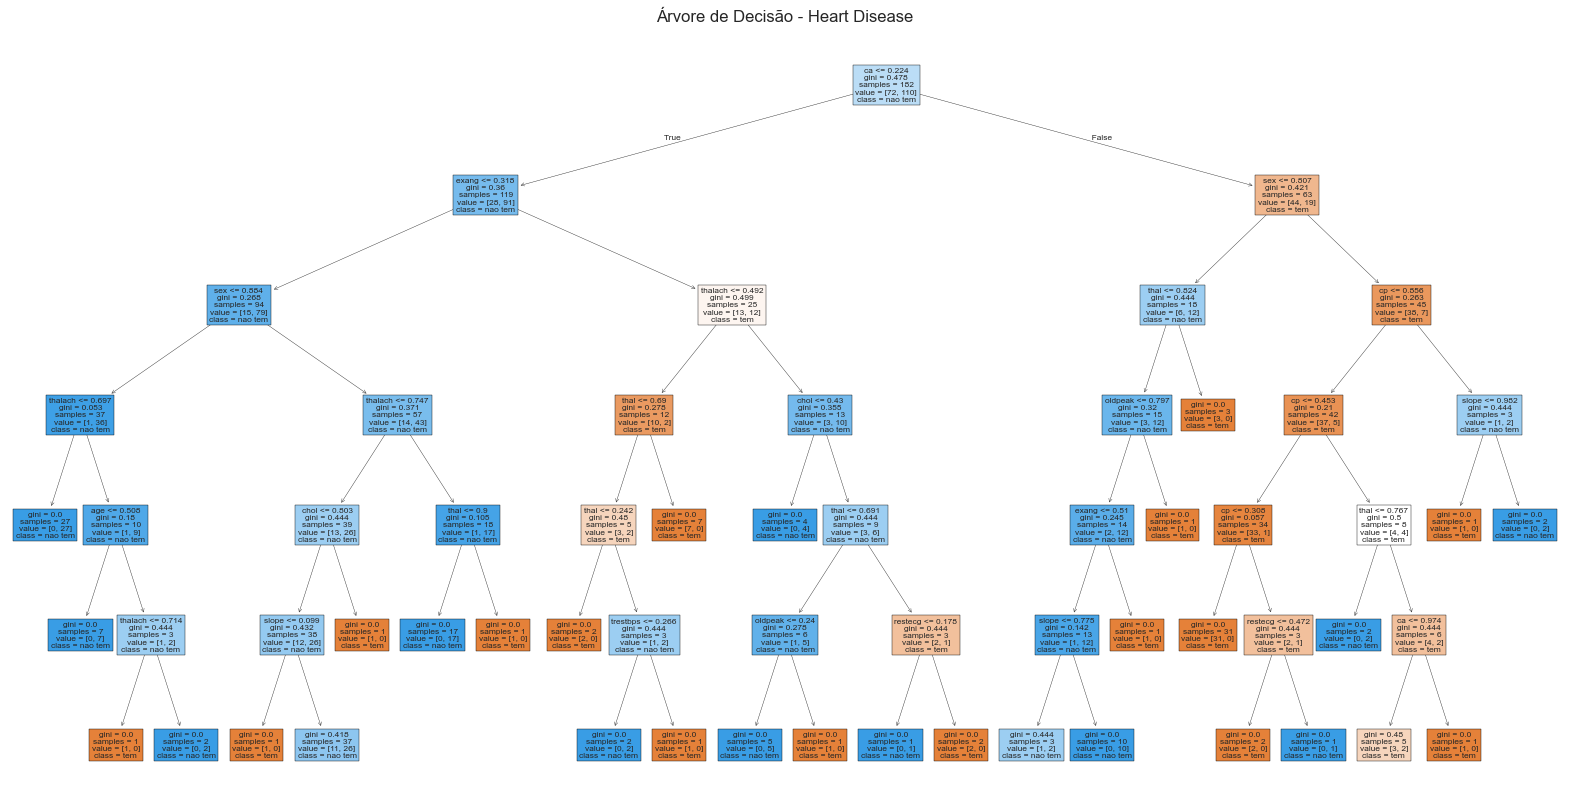

In [257]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['tem', 'nao tem'])
plt.title("Árvore de Decisão - Heart Disease")
plt.show()

In [258]:
confusion_matrix(y_teste_clean, previsoes)

array([[18,  6],
       [ 6, 16]])

In [259]:
print(classification_report(y_teste_clean, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.73      0.73      0.73        22

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46



DataSet com o KNN

In [260]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'splitter': ['random'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [261]:
modelo.fit(x_treino_knn, y_treino_knn)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'splitter': 'random', 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}
0.7841666666666667


In [262]:
modelo= DecisionTreeClassifier(**modelo.best_params_)
modelo.fit(x_treino_knn, y_treino_knn)


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       splitter='random')

In [263]:
X = data_knn.drop('target', axis=1)  # Features
y = data_knn['target']                # Target

In [264]:
previsoes = modelo.predict(x_teste_knn)
accuracy_score(y_teste_knn,previsoes)

0.8524590163934426

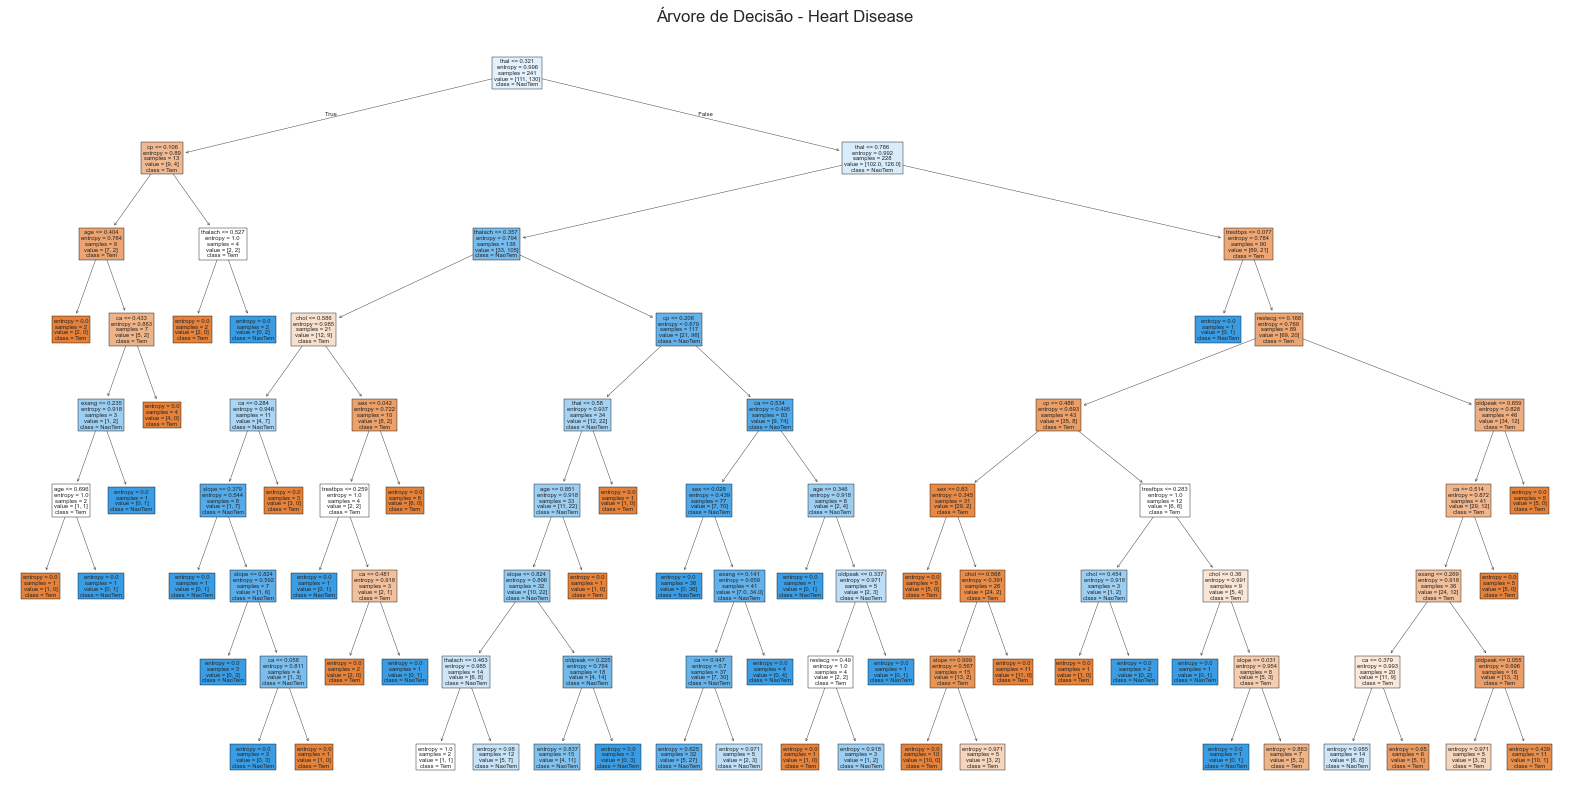

In [265]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['Tem', 'NaoTem'])
plt.title("Árvore de Decisão - Heart Disease")
plt.show()

In [266]:
confusion_matrix(y_teste_knn, previsoes)

array([[23,  4],
       [ 5, 29]])

In [267]:
print(classification_report(y_teste_knn, previsoes))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84        27
         1.0       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**Random Forest**

DataSet com os outliers removidos

In [268]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'n_estimators': [80,90,95,100],
    'max_features': [None, 'sqrt', 1.5,2,3],
    'random_state' : [None, 21, 42],
}

modelo = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)


In [269]:
modelo.fit(x_treino_clean, y_treino_clean)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'random_state': None, 'n_estimators': 95, 'max_features': 2, 'criterion': 'log_loss'}
0.8511695906432747


c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [270]:
modelo= RandomForestClassifier(**modelo.best_params_)
modelo.fit(x_treino_clean, y_treino_clean)

RandomForestClassifier(criterion='log_loss', max_features=2, n_estimators=95)

In [271]:
previsoes = modelo.predict(x_teste_clean)
accuracy_score(y_teste_clean,previsoes)

0.782608695652174

In [272]:
confusion_matrix(y_teste_clean, previsoes)

array([[19,  5],
       [ 5, 17]])

In [273]:
print(classification_report(y_teste_clean, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.77      0.77      0.77        22

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



DataSet com o KNN

In [274]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'criterion':  ['gini', 'entropy', 'log_loss'],
    'n_estimators': [80,90,95,100],
    'max_features': [None, 'sqrt', 1.5,2,3],
    'random_state' : [None, 21, 42],
}

modelo = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [275]:
modelo.fit(x_treino_knn, y_treino_knn)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'random_state': None, 'n_estimators': 90, 'max_features': 3, 'criterion': 'entropy'}
0.8383333333333333


c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\kntpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

In [276]:
modelo= RandomForestClassifier(**modelo.best_params_)
modelo.fit(x_treino_knn, y_treino_knn)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=90)

In [277]:
previsoes = modelo.predict(x_teste_knn)
accuracy_score(y_teste_knn,previsoes)

0.819672131147541

In [278]:
confusion_matrix(y_teste_knn, previsoes)

array([[23,  4],
       [ 7, 27]])

In [279]:
print(classification_report(y_teste_knn, previsoes))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81        27
         1.0       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Rede Neural Perceptron

In [280]:
import numpy as np

# Função de ativação (degrau)
def step_function(x):
    return 1 if x >= 0 else 0

# Classe Perceptron
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.uniform(-0.01, 0.01, input_dim + 1)  
        self.learning_rate = learning_rate

    def predict(self, inputs):
        # Verifica se é uma única amostra (vetor) ou múltiplas amostras (matriz)
        if inputs.ndim == 1:
            # Para uma única amostra
            inputs_with_bias = np.append(inputs, 1)  # Adiciona o bias
            weighted_sum = np.dot(self.weights, inputs_with_bias)
            return step_function(weighted_sum)
        else:
            # Para múltiplas amostras
            inputs_with_bias = np.hstack([inputs, np.ones((inputs.shape[0], 1))])  # Adiciona coluna de bias
            weighted_sum = np.dot(inputs_with_bias, self.weights)
            return np.where(weighted_sum >= 0, 1, 0)

    def evaluate(self, X, y):
        # Obter predições para todas as amostras
        predictions = self.predict(X)
        # Calcular acurácia
        accuracy = np.mean(predictions == y) * 100
        print(f"Acurácia: {accuracy:.2f}%")
        return accuracy

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            total_errors = 0
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)  # Predição para uma única amostra
                error = target - prediction
                if error != 0:
                    total_errors += 1
                    # Atualiza os pesos com base no erro
                    inputs_with_bias = np.append(inputs, 1)  # Adiciona o bias
                    self.weights += self.learning_rate * error * inputs_with_bias
            # Verifica se convergiu (nenhum erro)
            if total_errors == 0:
                print(f"Convergência alcançada na época {epoch + 1}")
                break
        print(f"Erros finais: {total_errors}")


Testando na base dados sem outliers

In [281]:
#Selecionando bases
treino_Perce_X= x_treino_clean.to_numpy()
treino_Perce_Y= y_treino_clean.to_numpy()

prev_Perce_X = x_prev_clean.to_numpy()
prev_Perce_Y = y_prev_clean.to_numpy()

perceptron = Perceptron(input_dim=treino_Perce_X.shape[1])

perceptron.train(treino_Perce_X, treino_Perce_Y)
perceptron.evaluate(prev_Perce_X, prev_Perce_Y)

Erros finais: 34
Acurácia: 72.81%


np.float64(72.80701754385966)

Treinamento Utilizando base com KNN

In [282]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Passo 1: Obter as predições
y_pred = perceptron.predict(prev_Perce_X)

# Passo 2: Calcular as métricas
precision = precision_score(prev_Perce_Y, y_pred)
recall = recall_score(prev_Perce_Y, y_pred)
f1 = f1_score(prev_Perce_Y, y_pred)

# Passo 3: Imprimir os resultados
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.96
Recall: 0.55
F1-Score: 0.70
